# Lets write some regular expresssions

In [1]:
# import modules
from pathlib import Path
import re

In [2]:
# set path variables
DATAPATH = Path(Path.cwd().parents[0] / 'data')    
DATAPATH.mkdir(parents=True, exist_ok=True)

In [3]:
class Regex:
  def __init__(self, my_string:str):
    self.string = my_string

  def find_pattern(self, pattern):
    print(re.findall(pattern, self.string))

  def match_sentence_ending(self):
    print(re.split(r"[..?!]", self.string))

  def find_capital_words(self):
    print(re.findall(r"[A-Z]\w+", self.string))

  def split_on_spaces(self):
    print(re.split(r"\s+", self.string))

  def find_digits(self):
    print(re.findall(r"\d+", self.string))

In [4]:
regex = Regex(my_string="Let's write RegEx!")
PATTERN = r"\w+"
#PATTERN = r"[a-z]"
#PATTERN = r"\w"
regex.find_pattern(PATTERN)

['Let', 's', 'write', 'RegEx']


In [5]:
regex = Regex("Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?")
regex.match_sentence_ending()
regex.find_capital_words()
regex.split_on_spaces()
regex.find_digits()

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


# Lets tokenize some words

In [6]:
import nltk
nltk.download('punkt')

# Import modules
import re
from nltk.tokenize import sent_tokenize, word_tokenize

c:\Users\Nutzer\.conda\envs\NLP\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
class Tokenize:
  def __init__(self, path, str_length=200):
    self.path = path
    f = open(self.path, "r")
    self.string = f.read(str_length)

  def split_into_sentences(self):
    sentences = sent_tokenize(self.string)
    return sentences

  def split_into_words(self):
    words = word_tokenize(self.string)
    return words

  def get_unique_tokens(self):
    unique_tokens = set(word_tokenize(self.string))
    return unique_tokens

  def locate_word(self, word):
    """ Locate indices of word in string"""
    match = re.search("Editor", self.string)
    return match.span()

  def match_digits(self):
    return re.findall(('\d+'), self.string)

  def match_words(self):
    return re.findall(('\w+'), self.string)  

  def match_digits_and_words(self):
    return re.findall(('(\d+|\w+)'), self.string)  

In [8]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=500)
tokenize.string

"MARCH # All Stories New and Complete Publisher Editor IF is published bi-monthly by Quinn Publishing Company, Inc., Kingston, New York. Volume #, No. #. Copyright # by Quinn Publishing Company, Inc. Application for Entry' as Second Class matter at Post Office, Buffalo, New York, pending. Subscription # for # issues in U.S. and Possessions: Canada # for # issues; elsewhere #. Aiiow four weeks for change of address. All stories appearing in this magazine are fiction. Any similarity to actual perso"

In [9]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=500)
sentences = tokenize.split_into_sentences()
sentences

['MARCH # All Stories New and Complete Publisher Editor IF is published bi-monthly by Quinn Publishing Company, Inc., Kingston, New York.',
 'Volume #, No.',
 '#.',
 'Copyright # by Quinn Publishing Company, Inc.',
 "Application for Entry' as Second Class matter at Post Office, Buffalo, New York, pending.",
 'Subscription # for # issues in U.S. and Possessions: Canada # for # issues; elsewhere #.',
 'Aiiow four weeks for change of address.',
 'All stories appearing in this magazine are fiction.',
 'Any similarity to actual perso']

In [10]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
word_tokenize(sentences[3])

['Copyright', '#', 'by', 'Quinn', 'Publishing', 'Company', ',', 'Inc', '.']

In [11]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=100)
tokenize.get_unique_tokens()

{'#',
 'All',
 'Complete',
 'Editor',
 'IF',
 'MARCH',
 'New',
 'Publisher',
 'Publishing',
 'Quinn',
 'Stories',
 'and',
 'bi-monthly',
 'by',
 'is',
 'published'}

In [12]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=100)
indices = tokenize.locate_word("Editor")
indices

(47, 53)

In [13]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=1000)
tokenize.match_digits()

[]

In [14]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=100)
tokenize.match_words()

['MARCH',
 'All',
 'Stories',
 'New',
 'and',
 'Complete',
 'Publisher',
 'Editor',
 'IF',
 'is',
 'published',
 'bi',
 'monthly',
 'by',
 'Quinn',
 'Publishing']

## Visualize Word Lengths

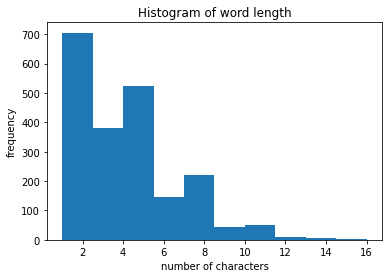

In [15]:
from matplotlib import pyplot as plt
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=10000)
words = tokenize.split_into_words()
word_lengths = [len(w) for w in words]
plt.hist(word_lengths)
plt.title('Histogram of word length')
plt.xlabel('number of characters')
plt.ylabel('frequency')
plt.show()

## Visualize Sentence Lengths

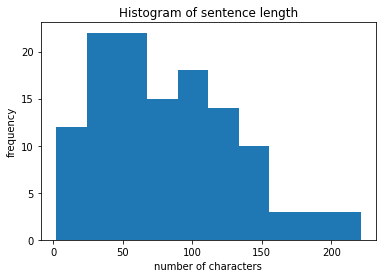

In [16]:
tokenize = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=10000)
sentences = tokenize.split_into_sentences()
sentence_lengths = [len(s) for s in sentences]
plt.hist(sentence_lengths)
plt.title('Histogram of sentence length')
plt.xlabel('number of characters')
plt.ylabel('frequency')
plt.show()

# Create simple bag-of-words model

In [17]:
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

class BagOfWords(Tokenize):
  def __init__(self, path, str_length):
    super().__init__(path, str_length)

  def lower_case(self, tokens):
    # Convert the tokens into lowercase: lower_tokens
    tokens = [token.lower() for token in tokens]
    return tokens

  def get_alphabetic_tokens(self, tokens):
    # use only alphabet tokens
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

  def remove_stopwords(self, tokens):
    # remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

  def lemmatize(self, tokens):
    # lemmatize words
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    return tokens
  
  def get_bag_of_words(self, n_words:int):
    """ return bag of words with n_words most frequent words. """
    # Tokenize
    tokens = self.get_unique_tokens()
    # Convert the tokens into lowercase: lower_tokens
    tokens = self.lower_case(tokens)
    # use only alphabet tokens
    tokens = self.get_alphabetic_tokens(tokens)
    # remove stopwords
    tokens = self.remove_stopwords(tokens)
    # lemmatize words
    tokens = self.lemmatize(tokens)
    # Create a Counter with the lowercase tokens: bow_simple
    bag_of_words = Counter(tokens)
    # return n_words most common tokens
    return bag_of_words.most_common(n_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
# init bag of words class
bow = BagOfWords(DATAPATH / "internet_archive_scifi_v3.txt", str_length=100000)
# get bag of words model
bow.get_bag_of_words(15)

[('time', 4),
 ('thing', 4),
 ('story', 3),
 ('office', 3),
 ('editor', 3),
 ('give', 3),
 ('woman', 3),
 ('detail', 3),
 ('child', 3),
 ('state', 3),
 ('court', 3),
 ('answer', 3),
 ('u', 3),
 ('step', 3),
 ('want', 3)]

In [19]:
# init tokenizer class
tokens = Tokenize(DATAPATH / "internet_archive_scifi_v3.txt", str_length=1000)
tokens.get_unique_tokens()

{'#',
 "'",
 "'d",
 ',',
 '.',
 ':',
 ';',
 'A',
 'Aiiow',
 'All',
 'Any',
 'Application',
 'Buffalo',
 'Canada',
 'Class',
 'Company',
 'Complete',
 'Copyright',
 'Editor',
 'Entry',
 'IF',
 'Inc',
 'Inc.',
 'Kingston',
 'MARCH',
 'New',
 'No',
 'Office',
 'Possessions',
 'Post',
 'Printed',
 'Publisher',
 'Publishing',
 'Quinn',
 'Second',
 'Stories',
 'Subscription',
 'The',
 'U.S.',
 'Volume',
 'We',
 'York',
 'a',
 'actual',
 'address',
 'after',
 'aid',
 'and',
 'appearing',
 'are',
 'as',
 'at',
 'be',
 'because',
 'bi-monthly',
 'brevity',
 'by',
 'c',
 'called',
 'change',
 'chat',
 'coffee',
 'coincidental',
 'could',
 'cup',
 'deal',
 'discarded',
 'easy',
 'editor',
 'effort',
 'elsewhere',
 'fcopy',
 'fiction',
 'field',
 'for',
 'formation',
 'four',
 'gone',
 'great',
 'had',
 'have',
 'i',
 'ia',
 'in',
 'indicative',
 'into',
 'is',
 'issues',
 'it',
 'its',
 'just',
 'lias',
 'magazine',
 'matter',
 'morning',
 'much',
 "n't",
 'of',
 'on',
 'pending',
 'persons',
 'p